<a href="https://colab.research.google.com/github/Cours-EDUlib/FAS-ISDS/blob/main/module-7/Applications/7-3_syntaxe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 7: Les statistiques et la science des données appliquées
##Application 3: régression linéaire simple avec VI catégorielle
###Syntaxe de l'exemple présenté

In [1]:
#Téléchargement des packages nécessaires
library (tidyverse)
install.packages("rsq")
require(rsq)
library(ggplot2)
install.packages("descr")
require(descr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’


Loading required package: rsq

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’


Loading required package: descr



Pour cet exemple, nous utiliserons une base de données contenant des informations sur 109 pays. Nous étudierons le lien entre les régions du monde et la consommation calorique quotidienne par habitant dans un pays.

In [10]:
path_to_csv = 'https://github.com/Cours-EDUlib/FAS-ISDS/blob/main/module-7/Applications/7-3_donnees.csv?raw=true' #Téléchargement de la base de données depuis github

bd <- read_csv(path_to_csv) #Enregistrement de la base de données dans l'ojet "bd" + identification des données manquantes

bd #Lecture des données (ignorez le message d'erreur, tant que la base de données s'affiche éventuellement)

Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“in

X,pays,region,calories
<int>,<chr>,<int>,<int>
1,Afghanistan,3,NA
2,Argentine,6,3113
3,Armnie,5,NA
4,Australie,1,3216
5,Autriche,1,3495
6,Azerbadjan,5,NA
7,Barhen,5,NA
8,Bangladesh,3,2021
9,Barbados,6,NA


Voici les variables à l'étude dans cet exemple:
- calories: nombre de calories consommé par habitant par jour dans un pays
- region: région du monde à laquelle appartient un pays

Remarquez la présence des lettres « NA » pour certains pays dans la variable calories. Ces lettres indiquent la présence d’une valeur manquante (Non Available), donc il faudra préciser à R de retirer ces observations de l’analyse en ajoutant l’argument correspondant dans les procédures exécutées.

Avant de continuer, il est utile d’attribuer des étiquettes aux valeurs de la variables régions. Les régions sont les suivantes : les pays de l’OCDE, qui comprennent globalement l’Europe occidentale et l’Amérique du Nord, l’Europe de l’est, l’Asie-Pacifique, l’Afrique, le Moyen-Orient et l’Amérique latine. 

In [17]:
#Identification des régions 1 à 6 (ajout d'étiquettes)

bd$region <- factor(bd$region,
levels = c(1,2,3,4,5,6),
labels = c("OCDE", "Europe de l'Est", "Asie-Pacifique", "Afrique", "Moyen-Orient", "Amérique latine")) 

Commençons par produire quelques statistiques descriptives de base pour se familiariser avec la variable indépendante à l'étude, soit les régions du monde.

,Frequency,Percent
OCDE,21,19.26606
Europe de l'Est,14,12.84404
Asie-Pacifique,17,15.59633
Afrique,19,17.43119
Moyen-Orient,17,15.59633
Amérique latine,21,19.26606
Total,109,100.00000


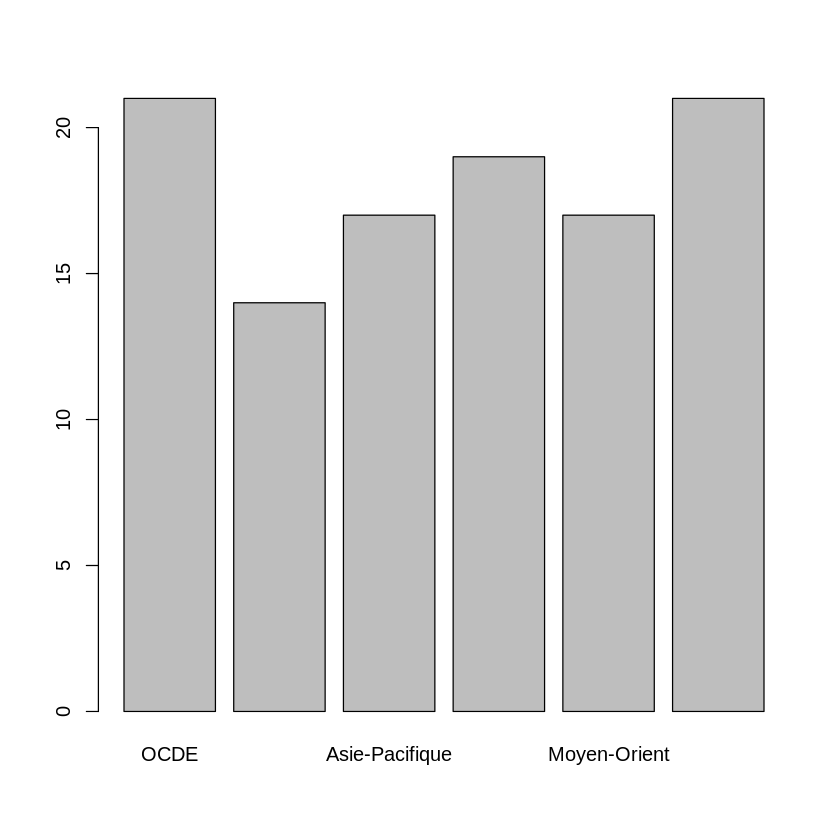

In [41]:
#Fréquences et distribution VI régions

freq(bd$region)

Interprétation:

Le tableau de fréquence, accompagné d’un graphique à barres par défaut, nous montre que chaque région contient un nombre similaire de pays, ce qui est important pour la régression linéaire, une région avec beaucoup moins ou plus de pays que les autres pouvant affecter les résultats. On a donc autour de 20 pays par régions, avec l’Europe de l’Est comme plus petite région avec 14 pays.

Produisons maintenant quelques statistiques descriptives de base pour la VD calories:
  - La moyenne
  - La médiane
  - Le minimum
  - Le maximum
  - l'écart-type

In [21]:
#Statistiques descriptives VD

summary(bd$calories)
sd(bd$calories)
sd(bd$calories, na.rm=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1667    2256    2653    2754    3226    3825      34 

[1] NA

[1] 567.8277

Interprétation:

La consommation calorique varie donc de 1667 à 3825 calories par habitants par jour selon les pays, avec un écart-type de 567,8. Notez la présence de 34 valeurs manquantes, indiquées à la fin de la ligne de statistiques descriptives. Dans notre analyse de régression, il n’y aura donc que 75 pays d’inclus puisque les autres n’ont pas de valeur valide pour la consommation calorique.

Warning message:
“Removed 34 rows containing non-finite values (stat_bin).”


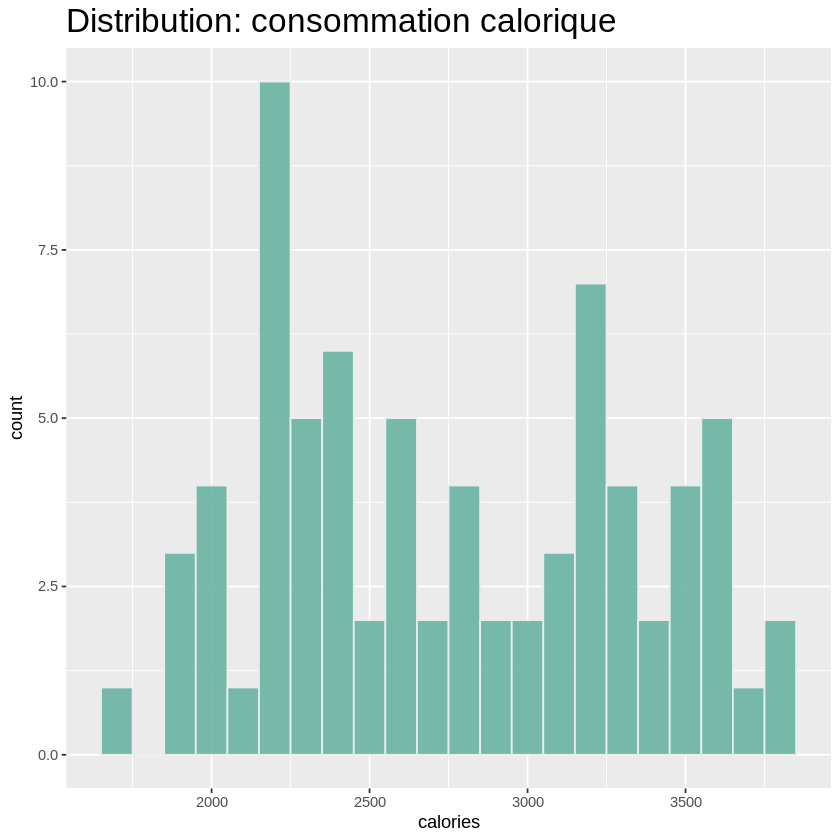

In [26]:
#Distribution VD calories

ggplot(bd, aes(x=calories)) +
  geom_histogram(binwidth=100, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
    ggtitle("Distribution: consommation calorique") +
    theme(
      plot.title = element_text(size=20)
    )

Interprétation:

La distribution semble plus ou moins normale. En fait, l’histogramme est plutôt aplati. Ce n’est pas aussi idéale qu’une distribution normale de la VI, mais l’absence d’asymétrie permet de continuer l’analyse de régression dans le respect des postulats.

Pour réaliser la régression linéaire avec une Vi catégorielle, il faut recoder celle-ci en variable factice. C'est ce que nous faisons ci-dessus, en enregistrant ces nouvelles variables dans une nouvelle base de données (bd2).

In [43]:
#Création des variables factices
bd2 <- bd 

bd2$OCDE <- ifelse(bd2$region=="OCDE", 1, 0)
bd2$EuropeEst <- ifelse(bd2$region=="Europe de l'Est", 1, 0)
bd2$AsiePacifique <- ifelse(bd2$region=="Asie-Pacifique", 1, 0)
bd2$Afrique <- ifelse(bd2$region=="Afrique", 1, 0)
bd2$MoyenOrient <- ifelse(bd2$region=="Moyen-Orient", 1, 0)
bd2$AmeriqueLatine <- ifelse(bd2$region=="Amérique latine", 1, 0)

#Visualiser la nouvelle base de données
bd2

Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“input string 2 is invalid in this locale”
Warning message in FUN(X[[i]], ...):
“in

X,pays,region,calories,OCDE,EuropeEst,AsiePacifique,Afrique,MoyenOrient,AmeriqueLatine
<int>,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Asie-Pacifique,NA,0,0,1,0,0,0
2,Argentine,Amérique latine,3113,0,0,0,0,0,1
3,Armnie,Moyen-Orient,NA,0,0,0,0,1,0
4,Australie,OCDE,3216,1,0,0,0,0,0
5,Autriche,OCDE,3495,1,0,0,0,0,0
6,Azerbadjan,Moyen-Orient,NA,0,0,0,0,1,0
7,Barhen,Moyen-Orient,NA,0,0,0,0,1,0
8,Bangladesh,Asie-Pacifique,2021,0,0,1,0,0,0
9,Barbados,Amérique latine,NA,0,0,0,0,0,1


Pour vérifier le succès du recodage, on va sortir des tableaux croisés entre la variable originale et chacune des variables factices, en utilisant la fonction crosstab. Cela nous permet de voir que chaque nouvelle variable contient le même nombre de pays qui valent « 1 » que sa région en contenait dans la variable originale, et qu’il s’agit bien des mêmes observations.

In [44]:
#Fréquences et distribution des variables factices

table(bd2$region, bd2$OCDE)
table(bd2$region, bd2$EuropeEst)
table(bd2$region, bd2$AsiePacifique)
table(bd2$region, bd2$Afrique)
table(bd2$region, bd2$MoyenOrient)
table(bd2$region, bd2$AmeriqueLatine)


                 
                   0  1
  OCDE             0 21
  Europe de l'Est 14  0
  Asie-Pacifique  17  0
  Afrique         19  0
  Moyen-Orient    17  0
  Amérique latine 21  0

                 
                   0  1
  OCDE            21  0
  Europe de l'Est  0 14
  Asie-Pacifique  17  0
  Afrique         19  0
  Moyen-Orient    17  0
  Amérique latine 21  0

                 
                   0  1
  OCDE            21  0
  Europe de l'Est 14  0
  Asie-Pacifique   0 17
  Afrique         19  0
  Moyen-Orient    17  0
  Amérique latine 21  0

                 
                   0  1
  OCDE            21  0
  Europe de l'Est 14  0
  Asie-Pacifique  17  0
  Afrique          0 19
  Moyen-Orient    17  0
  Amérique latine 21  0

                 
                   0  1
  OCDE            21  0
  Europe de l'Est 14  0
  Asie-Pacifique  17  0
  Afrique         19  0
  Moyen-Orient     0 17
  Amérique latine 21  0

                 
                   0  1
  OCDE            21  0
  Europe de l'Est 14  0
  Asie-Pacifique  17  0
  Afrique         19  0
  Moyen-Orient    17  0
  Amérique latine  0 21

Passons donc à la régression linéaire elle-même. En présence de variables factices binaires, il faut en insérer une de moins que la nombre de catégorie de la VI originale . On va insérer k-1 (k étant le nombre de catégorie de la variable) variable factices dans l’analyse, en gardant la catégorie exclues comme catégorie de référence. Donc ici, `k-1 = 6-1 = 5`. Ici, je vais conserver l’OCDE comme catégorie de référence et donc ne pas l’inclure dans l’analyse.


In [46]:
reglineaire <- glm(calories ~ EuropeEst+AsiePacifique+Afrique+MoyenOrient+AmeriqueLatine, data = bd2, family="gaussian")
summary(rstandard(reglineaire))
summary(reglineaire)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.1432 -0.8033  0.1703  0.0000  0.7186  2.5608 


Call:
glm(formula = calories ~ EuropeEst + AsiePacifique + Afrique + 
    MoyenOrient + AmeriqueLatine, family = "gaussian", data = bd2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-584.16  -214.52    46.33   179.67   683.73  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3435.67      66.00  52.053  < 2e-16 ***
EuropeEst         41.33     174.63   0.237  0.81360    
AsiePacifique   -921.39     107.17  -8.598 1.62e-12 ***
Afrique        -1283.35      96.22 -13.338  < 2e-16 ***
MoyenOrient     -352.29     118.99  -2.961  0.00421 ** 
AmeriqueLatine  -935.51      92.11 -10.157 2.45e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 78415.54)

    Null deviance: 23859697  on 74  degrees of freedom
Residual deviance:  5410672  on 69  degrees of freedom
  (34 observations deleted due to missingness)
AIC: 1065.8

Number of Fisher Scoring iterations: 2

**Équation de régression:**

Format: `Y = A + B1*X1 + B2*X2+ B3*X3 + B4*X4 + B5*X5`

**Équations: **

Générale: `Y = 3435.67 + (41.33*X1) + (-921.39*X2) + (-1283.35*X3) + (-352.29*X4) + (-935.51*X5) `

OCDE (X1-5=0): `Y = 3435.67 `

Europe de l'Est (X1=1; X2-5=0): `Y = 3435.67 + 41.33`

Asie-Pacifique (X2=1; X1,3-5=0): `Y = 3435.67 -921.39`

Afrique (X3=1; X1-2,4-5=0): `Y = 3435.67 -1283.35`

Moyen-Orient (X4=1; X1-3,5=0): `Y = 3435.67 -352.29`

Amérique Latine (X5=1; X1-4=0): `Y = 3435.67 -935.51`


Interprétation:

En ordre, la moyenne de consommation calorique quotidienne par pays est donc de 3476 en Europe de l’Est, 3435.67 dans l’OCDE, 3083,38 au Moyen-Orient, 2514,28 en Asie-Pacifique, 2500,16 en Amérique Latine et finalement 21152,32 en Afrique. Si on observe le niveau de signification pour chacune des variable ou régions, on voit que la majorité des régions se distinguent significativement de l’OCDE, sauf l’Europe de l’Est, ce qui n’est pas surprenant puisque son coefficient est considérablement plus petit en termes absolus que ceux des autres régions. Avec un écart-type de 567, il n’est pas surprenant qu’une différence de moyenne de 41 calories soit insignifiante.

